In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress


In [3]:
# File to Load (Remember to Change These)
file2="case_demographics_age.csv"

# Read Purchasing File and store into Pandas data frame

df= pd.read_csv(file2)

In [4]:
df.head()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
0,0-17,120,4/2/2020,NaN,NaN,NaN,NaN
1,18-49,5302,4/2/2020,NaN,NaN,NaN,NaN
2,50-64,2879,4/2/2020,NaN,NaN,NaN,NaN
3,65 and Older,2342,4/2/2020,NaN,NaN,NaN,NaN
4,Unknown,58,4/2/2020,NaN,NaN,NaN,NaN


In [5]:
age_df=df.dropna(how="any")
age_df.head()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
100,0-17,855,4/22/2020,2.29,0,0,22.49
101,18-49,18004,4/22/2020,48.18,99,7.09,43.52
102,50-64,10025,4/22/2020,26.83,223,15.97,18.42
103,65 and Older,8401,4/22/2020,22.48,1074,76.93,15.57
105,0-17,936,4/23/2020,2.38,0,0,22.49


In [6]:
age_df.count()

age_group         3071
totalpositive     3071
date              3071
case_percent      3071
deaths            3071
deaths_percent    3071
ca_percent        3071
dtype: int64

In [7]:
age_df["age_group"].value_counts()

50-64           618
0-17            618
18-49           618
65+             606
Missing         538
Unknown          60
65 and Older     12
age_group         1
Name: age_group, dtype: int64

In [8]:
age_df=age_df.loc[(age_df["age_group"]!="age_group")]
age_df["age_group"].value_counts()

50-64           618
0-17            618
18-49           618
65+             606
Missing         538
Unknown          60
65 and Older     12
Name: age_group, dtype: int64

In [9]:
age_df.tail()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
3287,0-17,444547,2/24/2021,12.8,14,0,22.5
3288,18-49,1983548,2/24/2021,57.3,3377,6.7,43.5
3289,50-64,660785,2/24/2021,19.1,9741,19.2,18.4
3290,65+,369313,2/24/2021,10.7,37510,74.1,15.6
3291,Missing,2133,2/24/2021,0.1,6,0,0


In [10]:
check=age_df.loc[age_df["age_group"]=="Unknown"]
check.tail()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
1951,Unknown,155,5/27/2020,0.2,0,0,0
1956,Unknown,159,5/28/2020,0.2,0,0,0
1961,Unknown,169,5/29/2020,0.2,0,0,0
1966,Unknown,172,5/30/2020,0.2,0,0,0
1971,Unknown,177,5/31/2020,0.2,0,0,0


In [11]:
check2=age_df.loc[age_df["age_group"]=="65 and Older"]
check2.tail()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
1755,65 and Older,8832,4/23/2020,22.5,1148,77.1,15.57
1760,65 and Older,9256,4/24/2020,22.5,1215,77.24,15.57
1765,65 and Older,9512,4/25/2020,22.56,1276,77.47,15.57
1770,65 and Older,9824,4/26/2020,22.6,1299,77.51,15.57
1775,65 and Older,10086,4/27/2020,22.4,1336,77.63,15.57


In [12]:
age_group=["0-17","18-49","50-64","65+","Missing","Unknown"]
Cases=[444547,1983548,660785,(369313+10086),2133,177]
Deaths=[14,3377,9741,(37510+1336),6,0]

Cali_Age_df=pd.DataFrame({"Age Groups":age_group,
                       "Cases":Cases,
                       "Deaths":Deaths})

Cali_Age_df

,Age Groups,Cases,Deaths
0,0-17,444547,14
1,18-49,1983548,3377
2,50-64,660785,9741
3,65+,379399,38846
4,Missing,2133,6
5,Unknown,177,0


In [13]:
Cali_Age_df.describe()

,Cases,Deaths
count,6.000000e+00,6.000000
mean,5.784315e+05,8664.000000
std,7.355504e+05,15263.772679
min,1.770000e+02,0.000000
25%,9.644950e+04,8.000000
50%,4.119730e+05,1695.500000
75%,6.067255e+05,8150.000000
max,1.983548e+06,38846.000000


Text(0.5, 1.0, 'Percentage of Cases for Age Groups impacted by COVID in California')

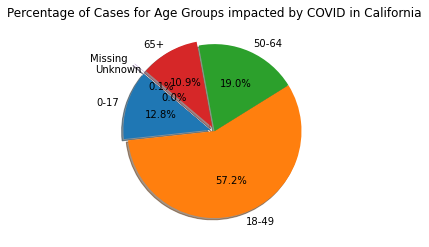

In [14]:
#Pie chart of the percentage(%) of genders impacted in California 
sizes=Cali_Age_df["Cases"]

labels=Cali_Age_df["Age Groups"].unique()

explode= (0.05,0,0,.05,0.2,0)

plt.pie(sizes, labels=labels,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of Cases for Age Groups impacted by COVID in California")

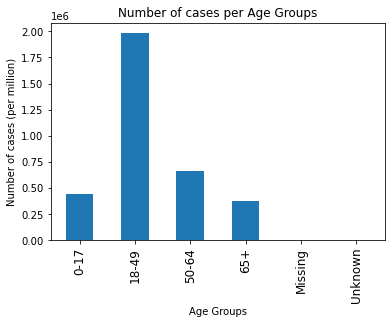

In [15]:
Ages = Cali_Age_df["Age Groups"]
Cases_load = Cali_Age_df["Cases"]
plt.title("Number of cases per Age Groups")
plt.ylabel("Number of cases (per million)")
plt.xlabel("Age Groups")
width = 0.5 
plt.xticks(rotation=90)
plt.bar(Ages, Cases_load, width)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.show()

Text(0.5, 1.0, 'Percentage of Cases for Age Groups impacted by COVID in California')

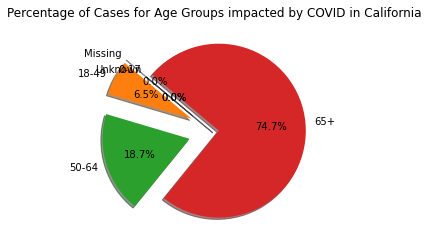

In [29]:
#Pie chart of the percentage(%) of genders impacted in California 
size=Cali_Age_df["Deaths"]

label=Cali_Age_df["Age Groups"].unique()

explode= (0,0.3,0.3,0.05,0.3,0)

plt.pie(size, labels=label,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of Cases for Age Groups impacted by COVID in California")

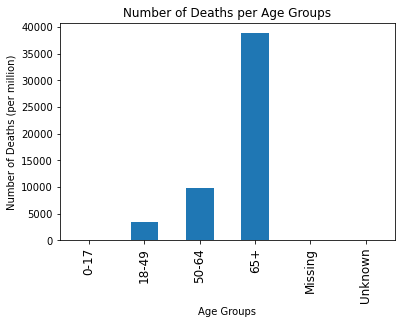

In [19]:
ages = Cali_Age_df["Age Groups"]
Death_Toll = Cali_Age_df["Deaths"]
plt.title("Number of Deaths per Age Groups")
plt.ylabel("Number of Deaths (per million)")
plt.xlabel("Age Groups")
width = 0.5 
plt.xticks(rotation=90)
plt.bar(ages , Death_Toll, width)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.show()